# LOAN DEFAULT PREDICTION

The data set used in this project describes details of customers and their status of if they defaulted or not on the payment of a loan. The aim of this project is to determine which algorithm is the best model for predicting the target variable(Default/Not default)

IMPORTING PACKAGES

The necessary packages needed for analysing the dataset were imported successfully. 

In [1]:
#Loading Packages
import numpy as np #Data processing library
import pandas as pd
import matplotlib.pyplot as plt #data visualization
plt.style.use('seaborn')
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

LOADING THE DATA

The data was loaded, and the csv file was read.

In [2]:
#Loading the dataset to read it
Loan = pd.read_csv('Loan_Default.csv')
Loan

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


DATAFRAME & STATISTICAL DESCRIBE

To understand the dataset and how it is distributed, the shape, size, head, and tail were generated. The statistical summary of the data was also generated showing count, mean, standard deviation, minimum, maximum and quartiles of each numerical columns. The data types were also generated which showed there were both numerical and categorical features.

In [3]:
#understanding the dataset, the number of rows and columns
print('Shape of data set is:', Loan.shape)
print('Size of data set is:', Loan.size)

Shape of data set is: (148670, 34)
Size of data set is: 5054780


In [4]:
Loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
Loan.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [6]:
#Checking the analysis (Statistical measures) of the data
Loan.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
#checking a quick description of the data types
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

DATA PREPROCESSING


The data was checked for duplicates and no duplicates were found. Missing values were found in some columns, and it was visualized to check the percentage in the columns containing missing values. It showed that 8 numerical columns and 6 categorical columns had missing values. The median was used to replace the missing values in the numerical columns whiles the mode was used to for the categorical columns.

In [8]:
#Checking the data for duplicates
Loan.duplicated().sum()

0

In [9]:
#Checking the data for missing values
missing_values = Loan.isna().sum()
print(missing_values)

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [10]:
#Handling missing values
#checking percentage of missing values
a =Loan.isnull().sum()/ len(Loan)*100
print(a)

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

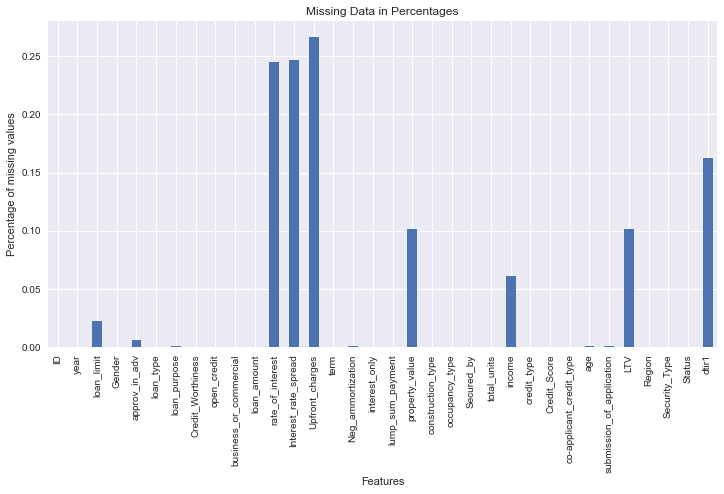

In [11]:
#plotting missing values in percentages
Loan.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

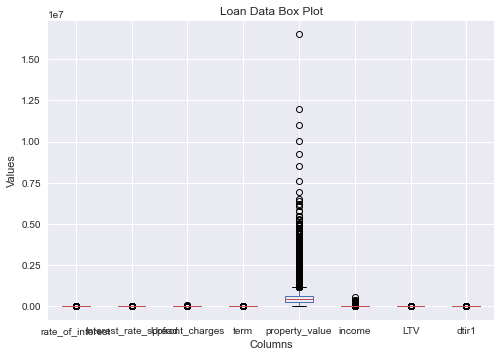

In [12]:
#Boxplot showing the skewness of the data
Loan[['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']].boxplot()

# Set the title of the plot
plt.title('Loan Data Box Plot')

# Set the labels for the x and y axis
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

In [13]:
#Replacing numerical columns with missing values with the median
imputer = SimpleImputer(strategy='median')
Loan[['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']] = imputer.fit_transform(Loan[['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']])

In [14]:
#Replacing the missing values in the categorical column with values in the mode
cat_cols=['age', 'loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'submission_of_application']

for col in cat_cols:
    Loan[col].fillna(Loan[col].mode()[0], inplace=True) 

In [15]:
#checking the missing values after imputation
Loan.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

DATA EXPLORATION AND VISUALIZATION

An exploratory analysis was performed to gain a better understanding and identify patterns in the data. It showed that 13 columns were numerical and 21 were categorical. Each column had unique values. 

In [16]:
# Checking the data column names
Loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

UNIVARIATE ANALYSIS

A visual analysis was generated to examine each numerical and categorical column to understand the characteristics and patterns in them. The Id and year columns were dropped because the Id would not be used for the analysis and the year contained a single value. This resulted in the numerical columns reducing to 11 columns. Each numerical and categorical column also contained uniques values.

In [17]:
#checking for number of columns with numerical data
num=Loan.select_dtypes(include=np.number).columns

len(num)

13

In [18]:
#checking the unique values in the numerical columns
for i in num:
    print('The number of unique values in', i, 'are:', Loan.loc[:,i].nunique())

The number of unique values in ID are: 148670
The number of unique values in year are: 1
The number of unique values in loan_amount are: 211
The number of unique values in rate_of_interest are: 131
The number of unique values in Interest_rate_spread are: 22516
The number of unique values in Upfront_charges are: 58272
The number of unique values in term are: 26
The number of unique values in property_value are: 385
The number of unique values in income are: 1001
The number of unique values in Credit_Score are: 401
The number of unique values in LTV are: 8484
The number of unique values in Status are: 2
The number of unique values in dtir1 are: 57


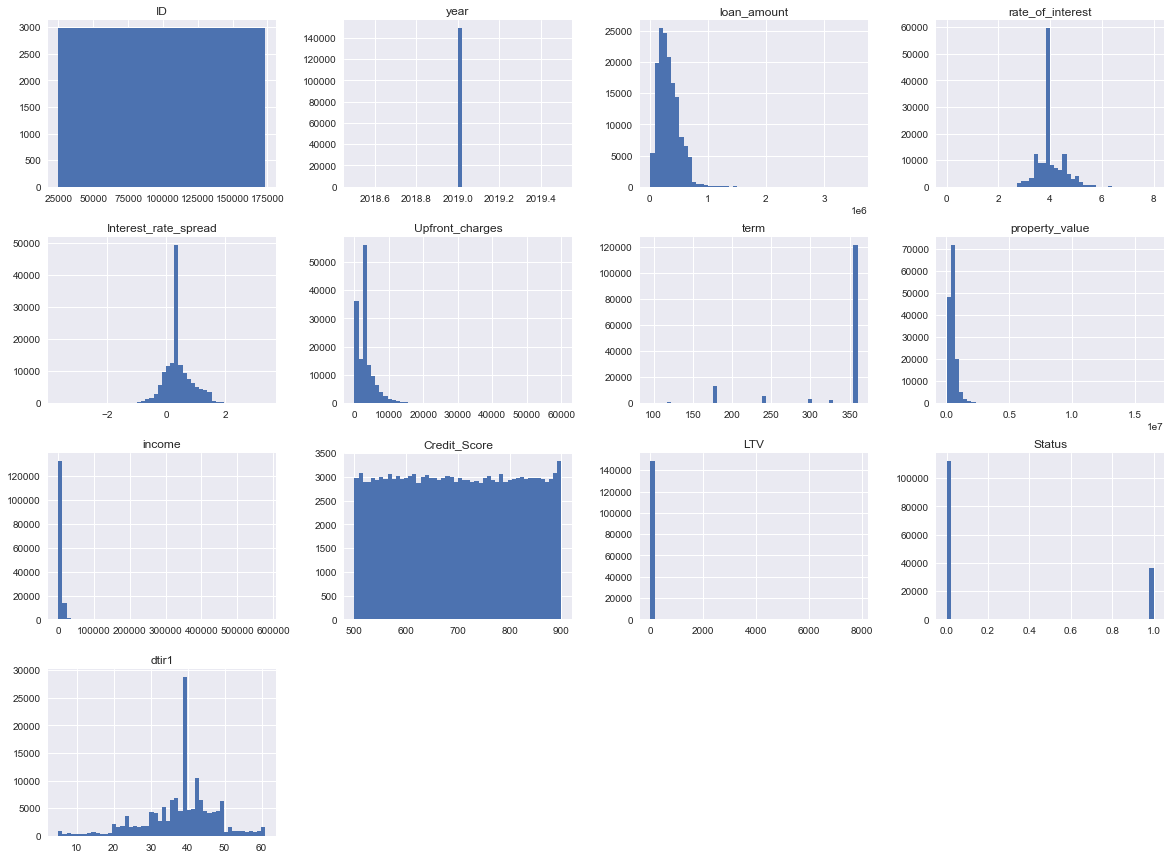

In [19]:
#visualizing the numerical columns
#histogram for each numerical columns
Loan.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
#Dropping columns that wont be used in the analysis
Loan = Loan.drop(['ID','year'], axis=1)

In [21]:
Loan.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [22]:
#checking for number of columns with numerical data
num=Loan.select_dtypes(include=np.number).columns
len(num)

11

In [23]:
#checking for the number of columns with categorical data
cat=Loan.select_dtypes(include='object').columns
len(cat)

21

In [24]:
#checking the unique values in the categorical columns
for i in cat:
    print('The number of unique values in', i, 'are:', Loan.loc[:,i].nunique())

The number of unique values in loan_limit are: 2
The number of unique values in Gender are: 4
The number of unique values in approv_in_adv are: 2
The number of unique values in loan_type are: 3
The number of unique values in loan_purpose are: 4
The number of unique values in Credit_Worthiness are: 2
The number of unique values in open_credit are: 2
The number of unique values in business_or_commercial are: 2
The number of unique values in Neg_ammortization are: 2
The number of unique values in interest_only are: 2
The number of unique values in lump_sum_payment are: 2
The number of unique values in construction_type are: 2
The number of unique values in occupancy_type are: 3
The number of unique values in Secured_by are: 2
The number of unique values in total_units are: 4
The number of unique values in credit_type are: 4
The number of unique values in co-applicant_credit_type are: 2
The number of unique values in age are: 7
The number of unique values in submission_of_application are: 

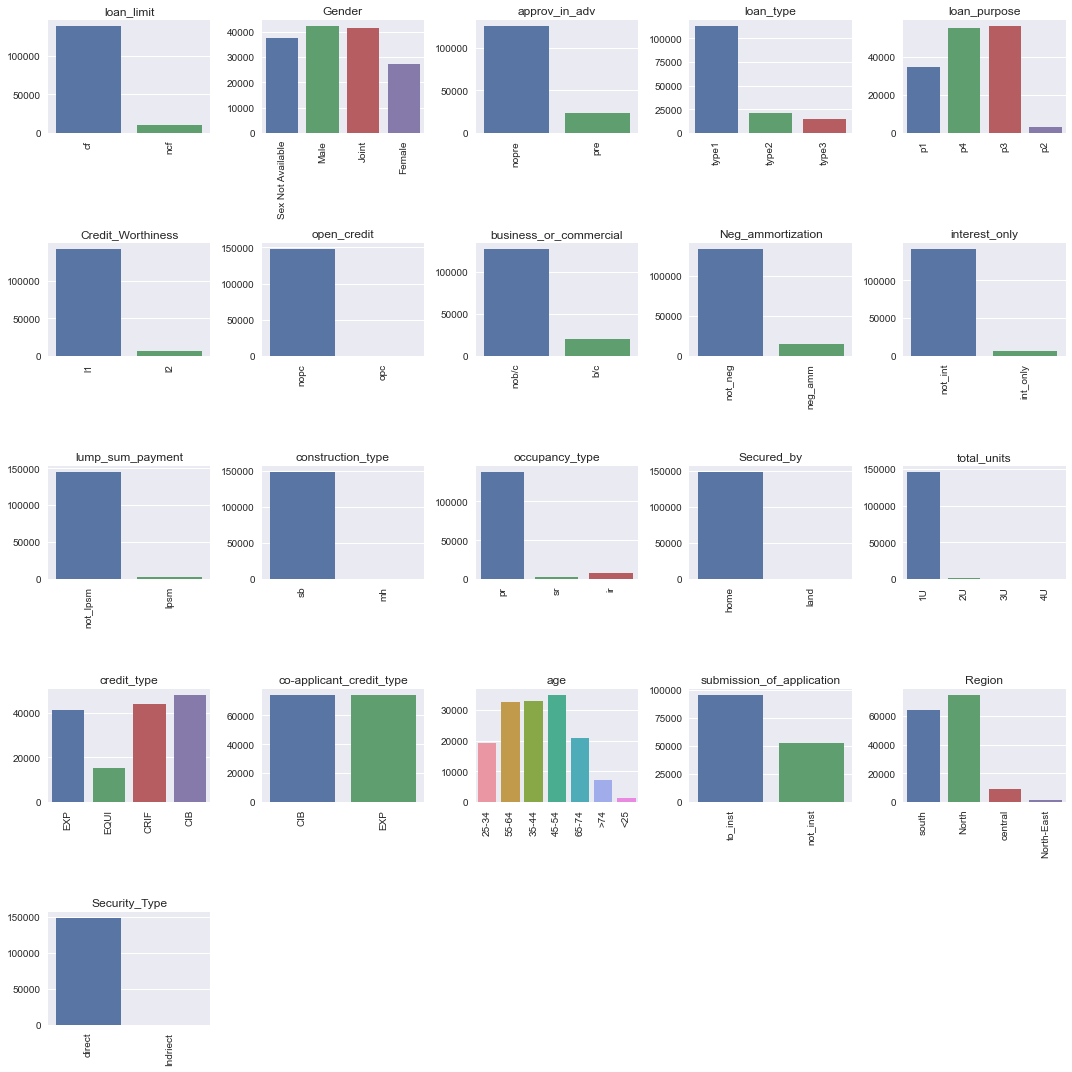

In [25]:
#visualizing categorical columns
num_plots = len(cat)
num_cols = 5
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=Loan, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)
    
fig.tight_layout()
plt.show()

The target variable was converted from a numerical value to defaulted and not defaulted to give a better understanding of the distribution of data between them. It was observed that there was an issue of class imbalance in the data. This would be looked at later on during this project by balancing the data.

In [26]:
#To visualize and understand the target variable, it was converted to categorical.
change={1:'defaulted', 0: 'Not defaulted'}
Loan['Status']= Loan['Status'].replace(change)

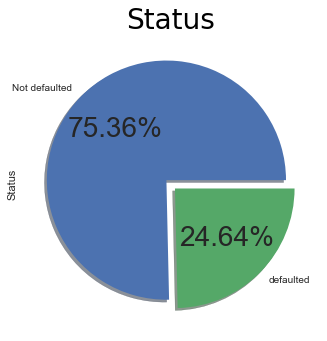

In [27]:
#visualizing The target variable
#Status(Not defaulted & defaulted)
plt.rcParams.update({'font.size': 28})
Loan['Status'].value_counts().plot.pie(explode=[0.05, 0.05],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Status',color='Black',loc='center',font='DejaVu Sans');

[Text(0, 0, '36639'), Text(0, 0, '112031')]

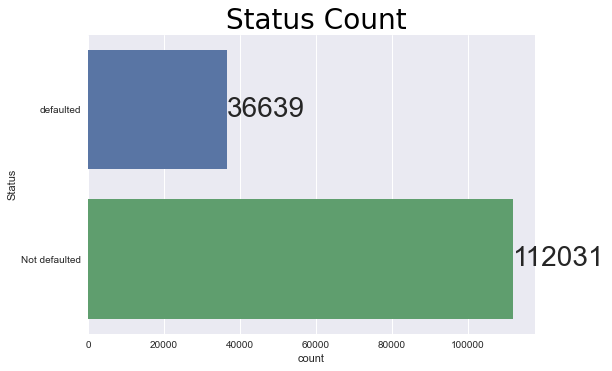

In [28]:
#The chart reveals that there is an imbalance in the number of records for Status, indicating an uneven distribution of data between individuals whose loan was defaulted and those who were not
ax = sns.countplot(y='Status', data=Loan)
plt.title(' Status Count',color='Black',font='DejaVu Sans');
ax.bar_label(ax.containers[0])

BIVARIATE ANALYSIS

To examine the relationship between the numerical, categorical and target variable, a bivariate analysis was done through bar plots, scatter plots and a correlation heatmap.It was observed that a higher number of columns contained the Status(0) of the target variable.

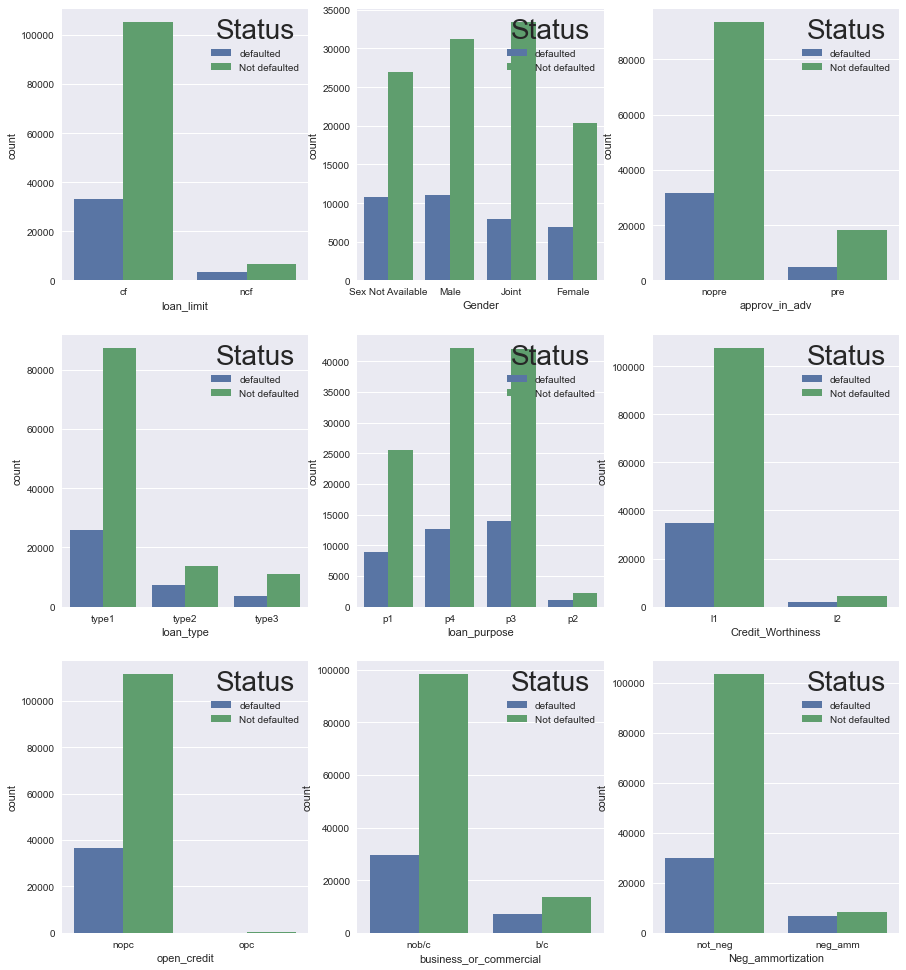

In [29]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical columns
cat_cols = ['loan_limit','Gender', 'approv_in_adv','loan_type','loan_purpose','Credit_Worthiness',
            'open_credit','business_or_commercial','Neg_ammortization']

fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=Loan, ax=ax[i // 3, i % 3], hue = "Status")
plt.show()

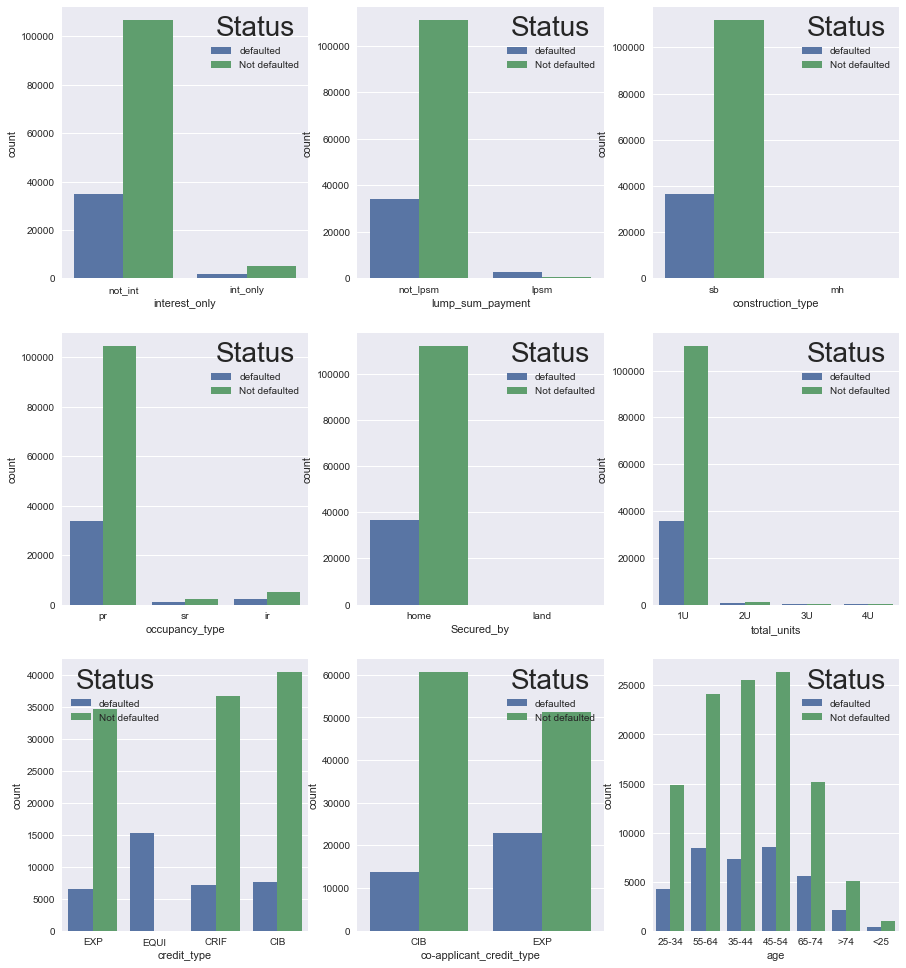

In [30]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical columns
cat_cols2 = ['interest_only', 'lump_sum_payment','construction_type','occupancy_type', 
             'Secured_by', 'total_units','credit_type','co-applicant_credit_type', 'age']

fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(cat_cols2):
    sns.countplot(x=col, data=Loan, ax=ax[i // 3, i % 3], hue = "Status")
plt.show()

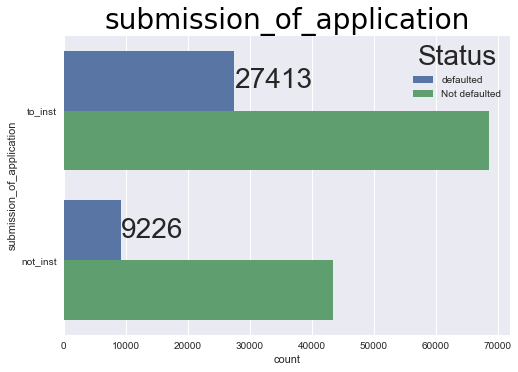

In [31]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical column 
ax = sns.countplot(y='submission_of_application',hue= 'Status', data=Loan)
ax.bar_label(ax.containers[0])
plt.title('submission_of_application',color='Black',font='DejaVu Sans');
plt.show()

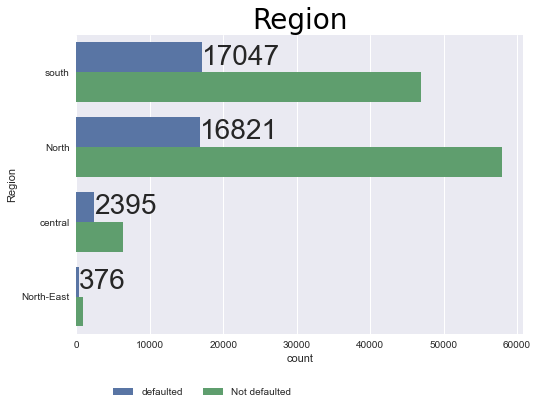

In [32]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical column
ax = sns.countplot(y='Region',hue= 'Status', data=Loan)
ax.bar_label(ax.containers[0])
ax.legend(bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.title('Region',color='Black',font='DejaVu Sans');
plt.show()

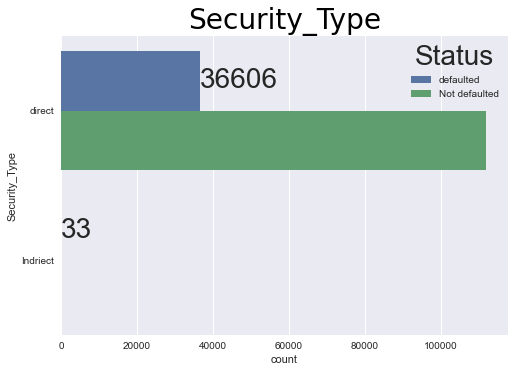

In [33]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical column
ax = sns.countplot(y='Security_Type',hue= 'Status', data=Loan)
ax.bar_label(ax.containers[0])
plt.title('Security_Type',color='Black',font='DejaVu Sans');
plt.show()

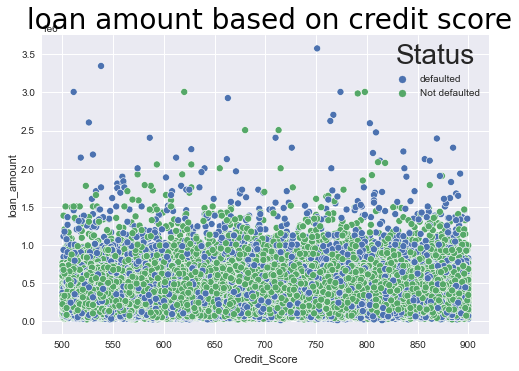

In [34]:
#visualizing numerical values against target variables
#scatter plot to show the distribution of loan based on credit score
fig,ax = plt.subplots()
sns.scatterplot(data=Loan, x='Credit_Score',y='loan_amount', hue = 'Status')
plt.title(' loan amount based on credit score',color='Black',font='DejaVu Sans');
plt.show()

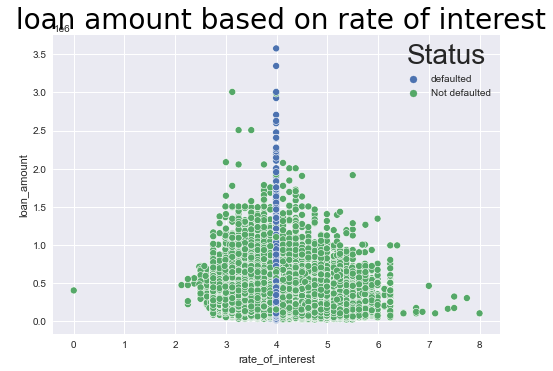

In [35]:
#scatter plot to show the distribution of loan based on rate of interest
fig,ax = plt.subplots()
sns.scatterplot(data=Loan, x='rate_of_interest',y='loan_amount', hue = 'Status')
plt.title(' loan amount based on rate of interest',color='Black',font='DejaVu Sans');
plt.show()

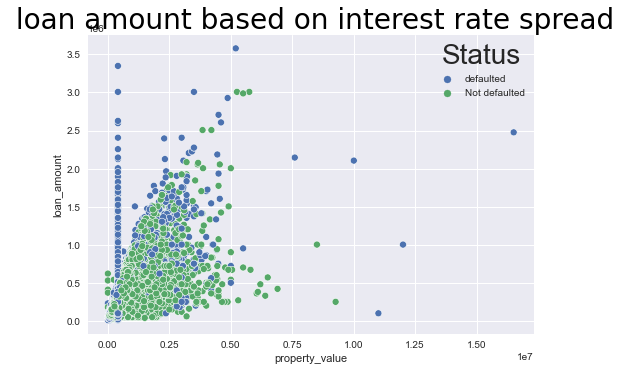

In [36]:
#scatter plot to show the distribution of loan based on property value
fig,ax = plt.subplots()
sns.scatterplot(data=Loan, x='property_value',y='loan_amount', hue = 'Status')
plt.title(' loan amount based on interest rate spread',color='Black',font='DejaVu Sans');
plt.show()

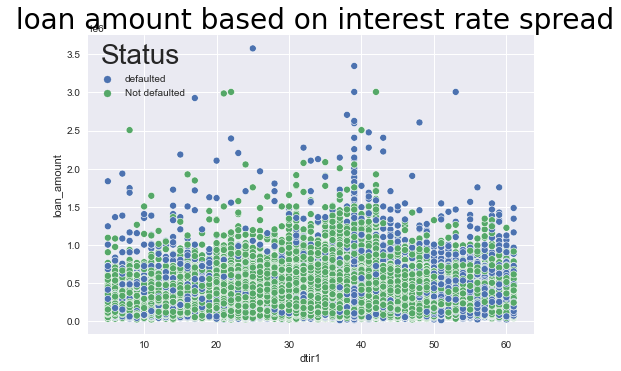

In [37]:
#scatter plot to show the distribution of loan based on debt to income ratio
fig,ax = plt.subplots()
sns.scatterplot(data=Loan, x='dtir1',y='loan_amount', hue = 'Status')
plt.title(' loan amount based on interest rate spread',color='Black',font='DejaVu Sans');
plt.show() 

A correlation heatmap was plotted to understand the correlation between the numerical columns and it was observed that some columns were closely related.

Text(0.5, 1.0, 'Correlation Heatmap')

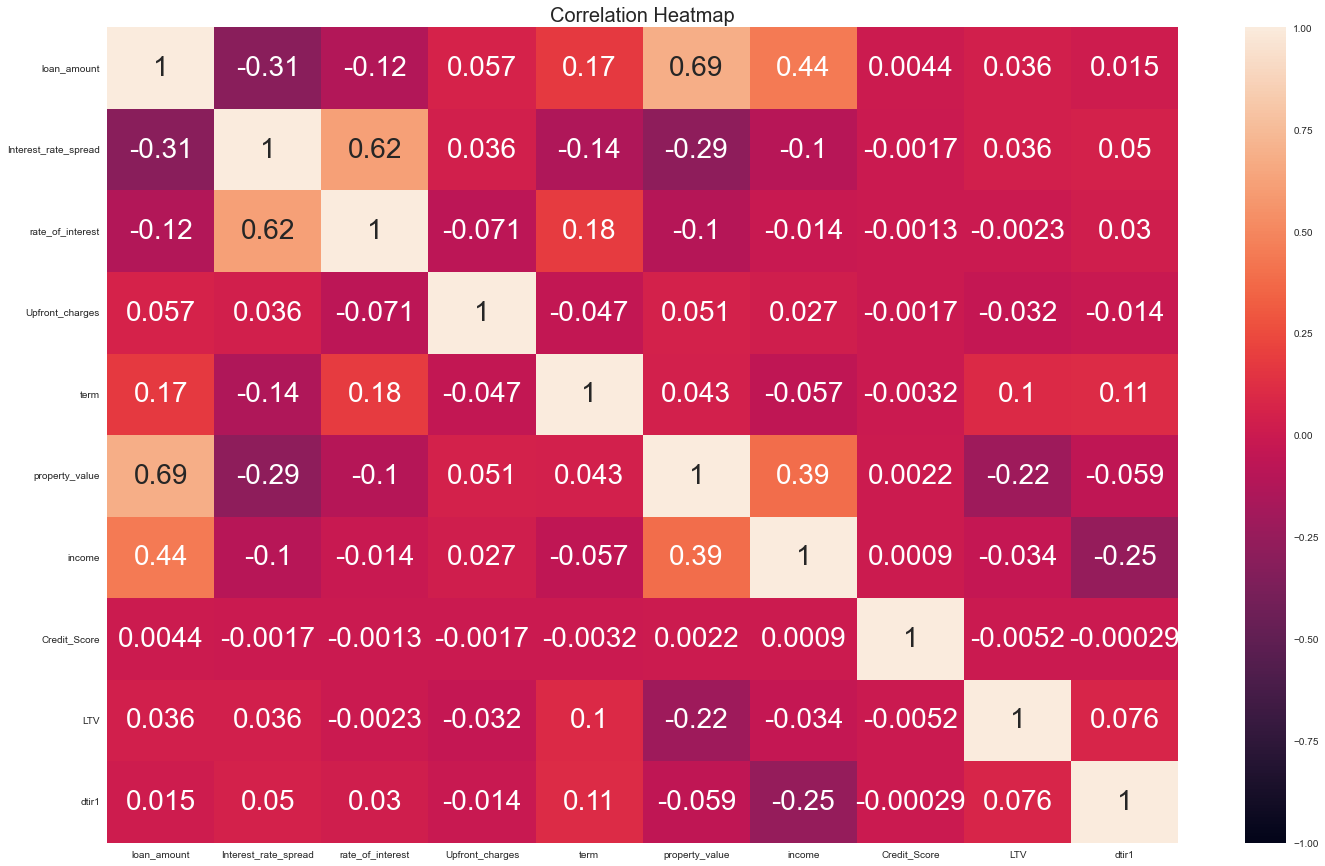

In [38]:
#A correlation heatmap to show the correlation between numerical columns
num_cols=['loan_amount','Interest_rate_spread','rate_of_interest', 'Upfront_charges','term',
           'property_value','income','Credit_Score','LTV','dtir1']

corr_matrix =Loan[num_cols].corr()
plt.figure(figsize=(24,15))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontsize=20)

FEATURE ENGINEERING 

To prepare the data for model implementation, Feature encoding was used to convert 20 categorical columns to numerical formats and the Age column was normalized by frequency of occurrence. The target variable was also converted back to numerical values.

In [39]:
#converting the target variable back to a numerical value
change={'defaulted':1,'Not defaulted':0}
Loan['Status']= Loan['Status'].replace(change)

In [40]:
#Encoding
##Converting all values to numerical values to be used in the machine learning model
cat

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [41]:
#Converting 20 categorical values to numerical values to be used in the machine learning modelLoan['loan_limit'].replace({'cf': 1, 'ncf': 0}, inplace=True)
Loan['Credit_Worthiness'].replace({'l1': 1, 'l2': 0}, inplace=True)
Loan['approv_in_adv'].replace({'pre': 1, 'nopre': 0}, inplace=True)
Loan['open_credit'].replace({'opc': 1, 'nopc': 0}, inplace=True)
Loan['business_or_commercial'].replace({'b/c': 1, 'nob/c': 0}, inplace=True)
Loan['Neg_ammortization'].replace({'neg_amm': 1, 'not_neg': 0}, inplace=True)
Loan['interest_only'].replace({'int_only': 1, 'not_int': 0}, inplace=True)
Loan['lump_sum_payment'].replace({'lpsm': 1, 'not_lpsm': 0}, inplace=True)
Loan['construction_type'].replace({'sb': 1, 'mh': 0}, inplace=True)
Loan['Secured_by'].replace({'home': 1, 'land': 0}, inplace=True)
Loan['co-applicant_credit_type'].replace({'CIB': 1, 'EXP': 0}, inplace=True)
Loan['submission_of_application'].replace({'to_inst': 1, 'not_inst': 0}, inplace=True)
Loan['Security_Type'].replace({'direct': 1, 'Indriect': 0}, inplace=True)
Loan['loan_type'].replace({'type1': 0, 'type2': 1, 'type3': 2}, inplace=True)
Loan['occupancy_type'].replace({'pr': 0, 'ir': 1, 'sr': 2}, inplace=True)
Loan['loan_purpose'].replace({'p1': 0, 'p2': 1, 'p3': 2, 'p4': 3}, inplace=True)
Loan['Gender'].replace({'Female': 0, 'Male': 1, 'Joint': 2, 'Sex Not Available': 3}, inplace=True)
Loan['total_units'].replace({'1U': 0, '2U': 1, '3U': 2, '4U': 3}, inplace=True)
Loan['credit_type'].replace({'CIB': 0, 'CRIF': 1, 'EQUI': 2, 'EXP': 3}, inplace=True)
Loan['Region'].replace({'North': 0, 'North-East': 1, 'central': 2, 'south': 3}, inplace=True)

Loan.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,1,3,0,0,0,1,0,0,116500,3.99,...,3,758,1,25-34,1,98.728814,3,1,1,45.0
1,1,1,0,1,0,1,0,1,206500,3.99,...,2,552,0,55-64,1,75.135870,0,1,1,39.0
2,1,1,1,0,0,1,0,0,406500,4.56,...,3,834,1,35-44,1,80.019685,3,1,0,46.0
3,1,1,0,0,3,1,0,0,456500,4.25,...,3,587,1,45-54,0,69.376900,0,1,0,42.0
4,1,2,1,0,0,1,0,0,696500,4.00,...,1,602,0,25-34,0,91.886544,0,1,0,39.0


In [42]:
## Normalizing the age column by frequency of occurence
Loan['age'].value_counts()

Loan['age']=Loan['age'].map(Loan['age'].value_counts(normalize=True))

In [43]:
Loan.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,1,3,0,0,0,1,0,0,116500,3.99,...,3,758,1,0.128755,1,98.728814,3,1,1,45.0
1,1,1,0,1,0,1,0,1,206500,3.99,...,2,552,0,0.218834,1,75.135870,0,1,1,39.0
2,1,1,1,0,0,1,0,0,406500,4.56,...,3,834,1,0.220744,1,80.019685,3,1,0,46.0
3,1,1,0,0,3,1,0,0,456500,4.25,...,3,587,1,0.234883,0,69.376900,0,1,0,42.0
4,1,2,1,0,0,1,0,0,696500,4.00,...,1,602,0,0.128755,0,91.886544,0,1,0,39.0


CHECKING OUTLIERS

A box plot was used to determine if there were outliers in the data and these were removed to prevent them from affecting the performance of the model.

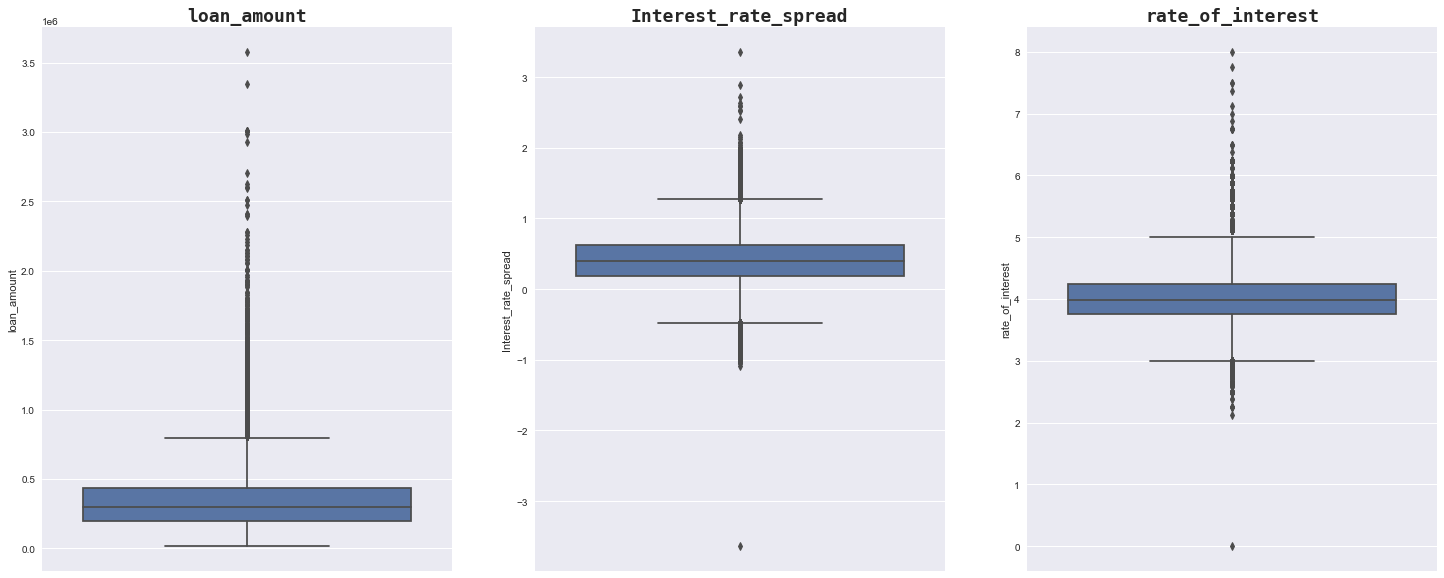

In [44]:
#Checking for outliers in the data set with a boxplot
num_cols=['loan_amount','Interest_rate_spread','rate_of_interest']

fig, ax = plt.subplots(1, 3, figsize = (25, 10))

for i, col in enumerate(num_cols):
    g = sns.boxplot(data = Loan, y = col, ax = ax[i], palette = "deep")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

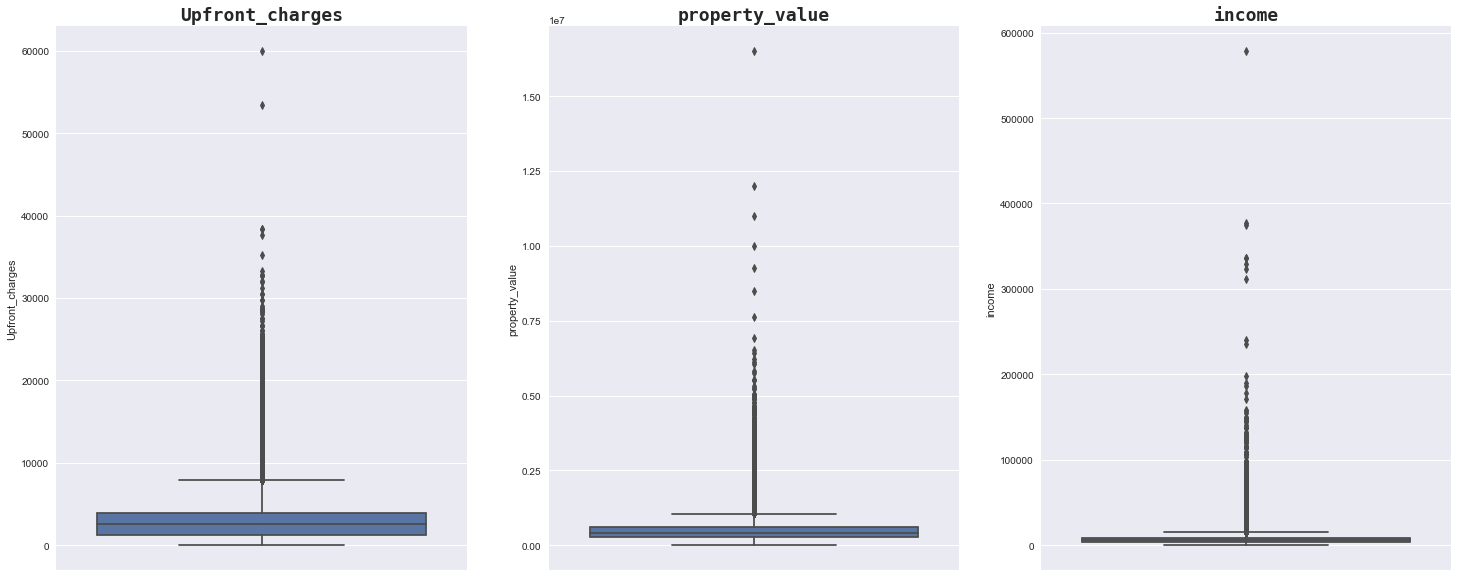

In [45]:
num_cols=['Upfront_charges','property_value','income']
#'Credit_Score','LTV','dtir1''term'
fig, ax = plt.subplots(1, 3, figsize = (25, 10))

for i, col in enumerate(num_cols):
    g = sns.boxplot(data = Loan, y = col, ax = ax[i], palette = "deep")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

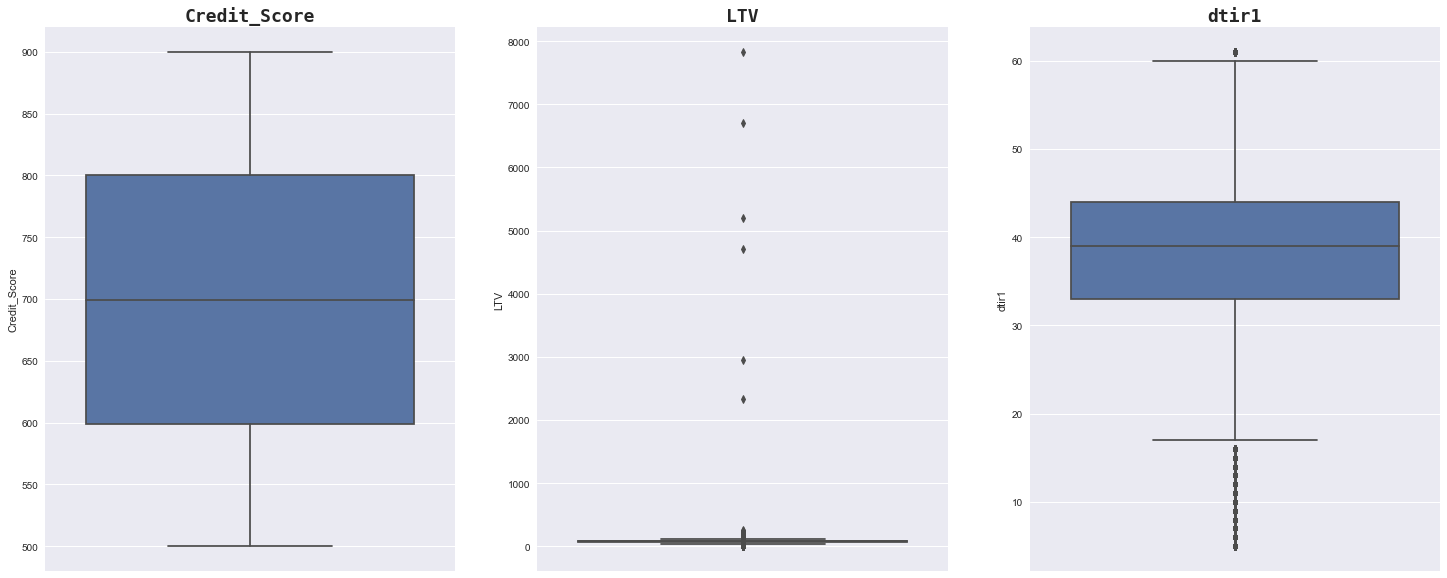

In [46]:
num_cols=['Credit_Score','LTV','dtir1']
#'','','''term'
fig, ax = plt.subplots(1, 3, figsize = (25, 10))

for i, col in enumerate(num_cols):
    g = sns.boxplot(data = Loan, y = col, ax = ax[i], palette = "deep")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

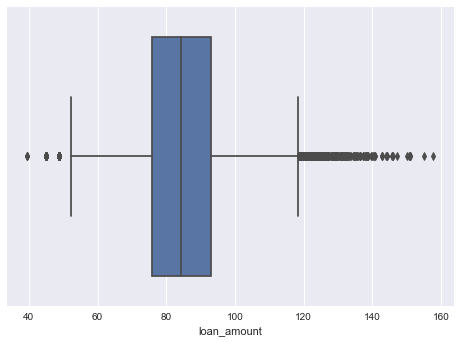

In [47]:
# removing outliers 
import scipy
Loan['loan_amount'],fitted_lambda= scipy.stats.boxcox(Loan['loan_amount'],lmbda=None)
sns.boxplot(Loan['loan_amount'])
plt.show()

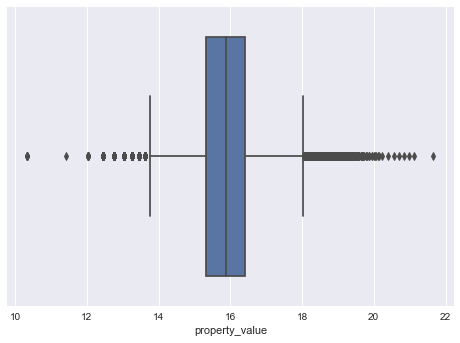

In [48]:
Loan['property_value'],fitted_lambda= scipy.stats.boxcox(Loan['property_value'],lmbda=None)
sns.boxplot(Loan['property_value'])
plt.show()

SPLITTING THE DATA

The data was split into train and test sets for model implementation. 

In [49]:
#Splitting the data to Train and Test
#Splitting into training set and test set
#80% training and 20% test
X = Loan.drop('Status', axis = 1)#features
y = Loan['Status']#target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,1,3,0,0,0,1,0,0,66.220960,3.990,...,1740.0,3,758,1,0.128755,1,98.728814,3,1,45.0
1,1,1,0,1,0,1,0,1,76.739048,3.990,...,4980.0,2,552,0,0.218834,1,75.135870,0,1,39.0
2,1,1,1,0,0,1,0,0,91.234015,4.560,...,9480.0,3,834,1,0.220744,1,80.019685,3,1,46.0
3,1,1,0,0,3,1,0,0,93.965439,4.250,...,11880.0,3,587,1,0.234883,0,69.376900,0,1,42.0
4,1,2,1,0,0,1,0,0,104.591376,4.000,...,10440.0,1,602,0,0.128755,0,91.886544,0,1,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,1,3,0,0,2,1,0,0,92.901426,3.125,...,7860.0,0,659,0,0.218834,1,71.792763,3,1,48.0
148666,1,1,0,0,0,1,0,0,100.135684,5.190,...,7140.0,0,569,1,0.128755,0,74.428934,3,1,15.0
148667,1,1,0,0,3,1,0,0,93.437940,3.125,...,6900.0,0,702,0,0.234883,0,61.332418,0,1,49.0
148668,1,0,0,0,3,1,0,0,75.767786,3.500,...,7140.0,3,737,0,0.218834,1,70.683453,0,1,29.0


In [51]:
y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64

FEATURE SELECTION USING ANOVA F-VALUE TEST

Feature selection was done using ANOVA F-test to determine the dependence between each feature and the target variable and this was visualized based on their F- value. The top 10 features were extracted and visualised to be used for model implementation.

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Select top 10 features using ANOVA F-value test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Print the selected feature names
feature_names = list(X.columns[selected_features])
print(feature_names)

['business_or_commercial', 'loan_amount', 'Upfront_charges', 'Neg_ammortization', 'lump_sum_payment', 'property_value', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'dtir1']


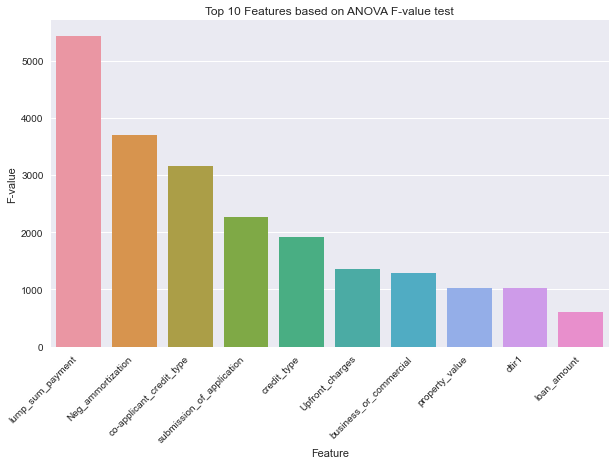

In [53]:
# select the relevant columns
#cols = ['business_or_commercial', 'loan_amount', 'Upfront_charges', 'Neg_ammortization', 
       # 'lump_sum_payment', 'property_value', 'credit_type', 'co-applicant_credit_type', 
        #'submission_of_application', 'dtir1']

# create a new DataFrame with the selected columns
df = Loan

# split the data into features and target
X = df.drop(['Status'], axis = 1)
y = df['Status']

# perform ANOVA F-value test
f_values, p_values = f_classif(X, y)

# create a DataFrame with the F-values and corresponding feature names
f_df = pd.DataFrame({'feature': X.columns, 'F-value': f_values})

# sort the DataFrame by F-value in descending order and select the top 10 features
top_features = f_df.sort_values(by='F-value', ascending=False).head(10)

# plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='F-value', data=top_features)
plt.title('Top 10 Features based on ANOVA F-value test')
plt.xlabel('Feature')
plt.ylabel('F-value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [54]:
top_features =  ['business_or_commercial', 'loan_amount', 'Upfront_charges', 'Neg_ammortization', 
        'lump_sum_payment', 'property_value', 'credit_type', 'co-applicant_credit_type', 
        'submission_of_application', 'dtir1']


X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print("X_train_selected shape:", X_train_selected.shape)
print("y_train shape:", y_train.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_test shape:", y_test.shape)

X_train_selected shape: (118936, 10)
y_train shape: (118936,)
X_test_selected shape: (29734, 10)
y_test shape: (29734,)


SCALING THE DATA

The train and test sets extracted from the feature selection technique were scaled using the Standard scaler and the shape was generated to ensure the steps were appropriately done.

In [55]:
# Extract the top 10 features
top_features = ['business_or_commercial', 'loan_amount', 'Upfront_charges', 'Neg_ammortization', 
        'lump_sum_payment', 'property_value', 'credit_type', 'co-applicant_credit_type', 
        'submission_of_application', 'dtir1']

# Keep only the top 10 features in the training and testing data
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# create a StandardScaler object
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert the scaled arrays to Pandas DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=top_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=top_features)

# Print the scaled training and test data
print("Scaled training data:")
print(X_train_scaled.head())
print("\nScaled test data:")
print(X_test_scaled.head())

Scaled training data:
   business_or_commercial  loan_amount  Upfront_charges  Neg_ammortization  \
0               -0.401131    -2.053092        -0.154569          -0.336615   
1               -0.401131     1.217216        -0.164744          -0.336615   
2                2.492950    -1.367261         0.035233          -0.336615   
3               -0.401131    -0.317799        -0.164744          -0.336615   
4               -0.401131     0.942377        -0.416511          -0.336615   

   lump_sum_payment  property_value  credit_type  co-applicant_credit_type  \
0         -0.153647       -2.253058    -1.117834                 -0.999765   
1         -0.153647        1.397552     1.393656                  1.000235   
2         -0.153647       -1.733181    -1.117834                  1.000235   
3         -0.153647       -0.618099     1.393656                  1.000235   
4         -0.153647        1.197948    -0.280671                 -0.999765   

   submission_of_application     dtir1  

In [56]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (118936, 10)
y_train shape: (118936,)
X_test_scaled shape: (29734, 10)
y_test shape: (29734,)


MODEL IMPLEMENTATION

To provide a reference point for comparing the performance of complex models, a baseline model was used to ensure the models were not overfitting or underperforming.
The models were implemented and the accuracy scores were visualised for both the training and test sets. 

In [57]:
#Providing a baseline model 
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(X_train, y_train)
y_pred_base = base.predict(X_test)

print(f"Your baseline model achieves accuracy = {accuracy_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(y_test, y_pred_base)}")

Your baseline model achieves accuracy = 0.7565077016210399
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


In [58]:
#Implementing the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,gnb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(X_train_scaled,y_train)
    y_train_pred = i_model.predict(X_train_scaled)
    y_test_pred = i_model.predict(X_test_scaled)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

In [59]:
models = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gaussian Naive Bayes']

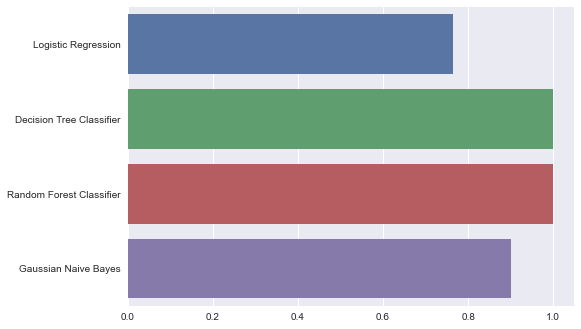

In [60]:
# visualizing the train model accuracy 
sns.barplot(y=models,x=train_acc)
plt.show()

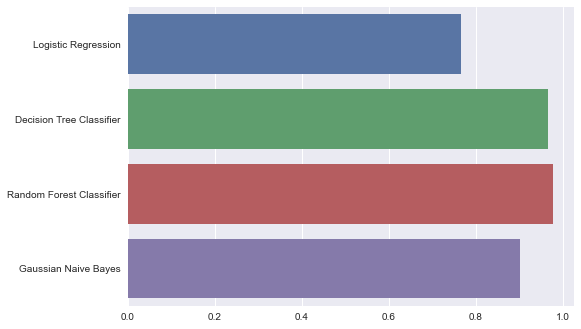

In [61]:
# visualizing the test model accuracy 
sns.barplot(y=models,x=test_acc)
plt.show()

COMPARING MODELS

To compare the model accuracies for each algorithm, the confusion matrix, classification report and the tabulated accuracy scores for the training and testing sets were generated. The results showed that Random Forest and Decision Tree classifiers performed better as compared to Gaussian Naive Bayes and Logistic Regression. It was also observed that there could be a problem of class imbalance and overfitting, therefore further analysis was done below.

In [62]:
#Generating the confusion matrices for all the algorithms
models = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

Confusion Matrix - Logistic Regression:
[[21637   857]
 [ 6067  1173]]

Confusion Matrix - Decision Tree:
[[22043   451]
 [  576  6664]]

Confusion Matrix - Random Forest:
[[21962   532]
 [  129  7111]]

Confusion Matrix - Gaussian Naive Bayes:
[[21324  1170]
 [ 1733  5507]]



In [63]:
#Genrating the classification report for each algorithm used
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     22494
           1       0.58      0.16      0.25      7240

    accuracy                           0.77     29734
   macro avg       0.68      0.56      0.56     29734
weighted avg       0.73      0.77      0.71     29734

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     22494
           1       0.94      0.92      0.93      7240

    accuracy                           0.97     29734
   macro avg       0.96      0.95      0.95     29734
weighted avg       0.97      0.97      0.97     29734

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     22494
           1       0.93      0.98      0.96      7240

    accuracy                           0.98     29734
  

In [64]:
#Tabulating the accuracy score for all the models based on the training and test sets.
model_summary = pd.DataFrame({'Model':model_names,'Train Score':train_acc,'Test Score':test_acc})
model_summary

,Model,Train Score,Test Score
0,Logistic Regression,0.764546,0.767135
1,Decision Tree,0.999395,0.965460
2,Random Forest,0.999395,0.977770
3,Gaussian Naive Bayes,0.900804,0.902368


PLOTTING THE ROC CURVE

The roc curve was plotted for each Algorithm to determine how well each of them performed in predicting the target variable. it displayed the false positive and true positive rates in the curve.

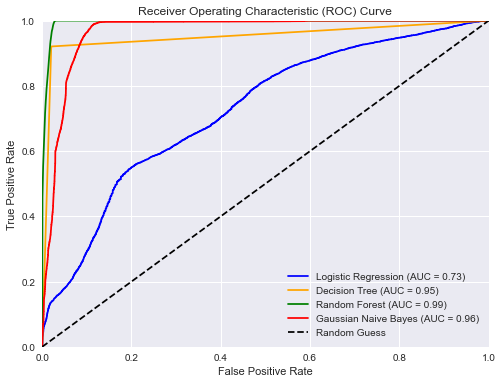

In [65]:
#Plotting the roc curve for model comparison
model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# MODEL PERFORMANCE ENHANCEMENT

In order to improve the model performance and accuracy of the models, some model enhancement techniques such as Random undersampling, K-Fold cross-validation and Hyperparameter tuning were done

PERFORMING RANDOM UNDERSAMPLING ON TARGET VARIABLE

To address the class imbalance issue, random undersampling technique was used to help improve the prformance of the minority class as well as reduce a bias prediction of the models.

In [66]:
#Performing Random Under sampling technique to balance the target variable
from sklearn.utils import resample

y = Loan['Status'] # target variable
target = y

# Separate majority and minority classes
majority_class = Loan[y == 0]
minority_class = Loan[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_loan = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_loan = undersampled_loan.sample(frac=1, random_state=42)
print("Shape of undersampled_loan:", undersampled_loan.shape)

Shape of undersampled_loan: (73278, 32)


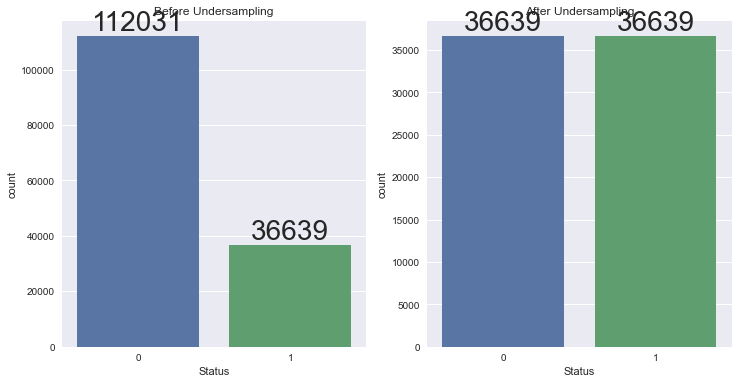

In [67]:
# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=Loan, x='Status', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before Undersampling')
sns.countplot(data=undersampled_loan, x='Status', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After Undersampling')
plt.show()

SCALING THE DATA AFTER UNDERSAMPLING


Using the top 10 features from the feature selection technique, the correspoinding train and test sets for the x variables and the resampled y variables were extracted and scaled using the standard scaler

In [68]:
# Scaling the data after undersampling to use for model implementation.
top_features =  ['business_or_commercial', 'loan_amount', 'Upfront_charges', 'Neg_ammortization', 
        'lump_sum_payment', 'property_value', 'credit_type', 'co-applicant_credit_type', 
        'submission_of_application', 'dtir1']


# Apply feature selection on undersampled data
X_selected = undersampled_loan[top_features]
y_selected = y[X_selected.index]


# Split into training and testing sets
X_train_selected, X_test_selected, y_train_res, y_test_res = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_selected)
X_test_scaler = scaler.transform(X_test_selected)

# Convert the scaled arrays to Pandas DataFrames with feature names
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_selected.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_selected.columns)

# Print the shapes of the new datasets
print("Shape of X_train_scaler:", X_train_scaler.shape)
print("Shape of X_test_scaler:", X_test_scaler.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of y_test_res:", y_test_res.shape)

Shape of X_train_scaler: (58622, 10)
Shape of X_test_scaler: (14656, 10)
Shape of y_train_res: (58622,)
Shape of y_test_res: (14656,)


PERFORMING K-FOLD CROSS-VALIDATION AFTER UNDERSAMPLING TO TRAINING DATA

A K- Fold cross validation was done using all the four algorithms to obtain the mean accuracy score for each model.

In [69]:
#Performing K-fold cross validation for all four models
# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42)
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, X_train_scaler, y_train_res, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [0.97014925 0.97185501 0.97176731 0.97193791 0.97082907]
Average accuracy for DecisionTreeClassifier: 0.9713077106062027

Accuracy for RandomForestClassifier: [0.98609808 0.9852452  0.98379393 0.98370863 0.98549983]
Average accuracy for RandomForestClassifier: 0.9848691343690961

Accuracy for GaussianNB: [0.93953092 0.93765458 0.94370522 0.93585807 0.93389628]
Average accuracy for GaussianNB: 0.9381290142357376

Accuracy for LogisticRegression: [0.66319829 0.65995736 0.66137837 0.65668714 0.65975776]
Average accuracy for LogisticRegression: 0.6601957837657741



USING HYPERPARAMETERS AND GRIDSEARCH WITH CROSS VALIDATION ON RESAMPLED DATA

Hyperparameter tuning was performed on all the algorithms to determine the best hyperparameter to boost the performance of each model using the Grid Search CV.

In [70]:
# Performing hyperparameter tuning to select the best parameters for each model
# Define the hyperparameter search space for each model
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Instantiate each model
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()

The models were implemented using the best parameters for each algorithms and the accuracy scores for both the training and testing sets were generated

In [71]:
# Perform grid search with cross-validation on the resampled training set for decision tree model
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_scaler, y_train_res)

# Train the final model on the entire resampled training set with the best hyperparameters for each model
best_dt = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=42)
best_dt.fit(X_train_scaler, y_train_res)

# Get the training accuracy score
train_dt_accuracy = best_dt.score(X_train_scaler, y_train_res)

# Evaluate the final models on the test set for each model
dt_y_pred = best_dt.predict(X_test_scaler)
dt_accuracy = accuracy_score(y_test_res, dt_y_pred)
dt_confusion = confusion_matrix(y_test_res, dt_y_pred)

# Print the evaluation results
print("Decision Tree Classifier")
print("Training Accuracy:", train_dt_accuracy)
print("Test Accuracy:", dt_accuracy)

Decision Tree Classifier
Training Accuracy: 0.9858073760704172
Test Accuracy: 0.9861490174672489


In [72]:
# Perform grid search with cross-validation on the resampled training set for Logistic regression model
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_scaler, y_train_res)

# Train the final model on the entire resampled training set with the best hyperparameters for each model
best_lr = LogisticRegression(**lr_grid_search.best_params_, random_state=42)
best_lr.fit(X_train_scaler, y_train_res)

# Get the training accuracy score
train_lr_accuracy = best_lr.score(X_train_scaler, y_train_res)

# Evaluate the final models on the test set for each model
lr_y_pred = best_lr.predict(X_test_scaler)
lr_accuracy = accuracy_score(y_test_res, lr_y_pred)
lr_confusion = confusion_matrix(y_test_res, lr_y_pred)

# Print the evaluation results
print("Logistic Regression")
print("Training Accuracy:", train_lr_accuracy)
print("Test Accuracy:", lr_accuracy)

Logistic Regression
Training Accuracy: 0.6607587595100816
Test Accuracy: 0.6610262008733624


In [73]:
# Perform grid search with cross-validation on the resampled training set for random forest model
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaler, y_train_res)

# Train the final model on the entire resampled training set with the best hyperparameters for each model
best_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
best_rf.fit(X_train_scaler, y_train_res)

# Get the training accuracy score
train_rf_accuracy = best_rf.score(X_train_scaler, y_train_res)

# Evaluate the final models on the test set for each model
rf_y_pred = best_rf.predict(X_test_scaler)
rf_accuracy = accuracy_score(y_test_res, rf_y_pred)
rf_confusion = confusion_matrix(y_test_res, rf_y_pred)

# Print the evaluation results
print("Random Forest Classifier")
print("Training Accuracy:", train_rf_accuracy)
print("Test Accuracy:", rf_accuracy)

Random Forest Classifier
Training Accuracy: 0.9855514994370714
Test Accuracy: 0.9858078602620087


In [74]:
# Perform grid search with cross-validation on the resampled training set for naive bayes model
gnb_grid_search = GridSearchCV(gnb, gnb_param_grid, cv=5, scoring='accuracy')
gnb_grid_search.fit(X_train_scaler, y_train_res)

# Train the final model on the entire resampled training set with the best hyperparameters for each model
best_gnb = GaussianNB(**gnb_grid_search.best_params_)
best_gnb.fit(X_train_scaler, y_train_res)

# Get the training accuracy score
train_gnb_accuracy = best_gnb.score(X_train_scaler, y_train_res)

# Evaluate the final models on the test set for each model
gnb_y_pred = best_gnb.predict(X_test_scaler)
gnb_accuracy = accuracy_score(y_test_res, gnb_y_pred)
gnb_confusion = confusion_matrix(y_test_res, gnb_y_pred)

# Print the evaluation results
print("Gaussian NB")
print("Training Accuracy:", train_gnb_accuracy)
print("Test Accuracy:", gnb_accuracy)

Gaussian NB
Training Accuracy: 0.9381460884991982
Test Accuracy: 0.9380458515283843


COMPARING MODELS AFTER CROSS VALIDATION

To compare the model accuracies for each algorithm, the confusion matrix, classification report and the tabulated accuracy scores for the training and testing sets were generated. The results showed that Random Forest and Decision Tree classifiers performed better as compared to Gaussian Naive Bayes and Logistic Regression. A bar plot was used to compare the accuracies for all the algorithms.

In [75]:
#Generating the confusion matrices for all the algorithms
models = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(X_train_scaler, y_train_res)
   
    # Make predictions on the test data
    y_pred = model.predict(X_test_scaler)
   
    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_res, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

Confusion Matrix - Logistic Regression:
[[4902 2441]
 [2527 4786]]

Confusion Matrix - Decision Tree:
[[7174  169]
 [ 257 7056]]

Confusion Matrix - Random Forest:
[[7150  193]
 [  25 7288]]

Confusion Matrix - Gaussian Naive Bayes:
[[6693  650]
 [ 258 7055]]



In [76]:
#Generating the classification report for each algorithm used
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(X_test_scaler)
    print(classification_report(y_test_res, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      7343
           1       0.66      0.65      0.66      7313

    accuracy                           0.66     14656
   macro avg       0.66      0.66      0.66     14656
weighted avg       0.66      0.66      0.66     14656

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7343
           1       0.98      0.96      0.97      7313

    accuracy                           0.97     14656
   macro avg       0.97      0.97      0.97     14656
weighted avg       0.97      0.97      0.97     14656

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7343
           1       0.97      1.00      0.99      7313

    accuracy                           0.99     14656
  

In [77]:
#Tabulating the accuracy score for all the models based on the training and test sets.
# Create a dictionary of model names and their evaluation results
results = {'Logistic Regression': [lr_accuracy,train_lr_accuracy],
           'Decision Tree': [dt_accuracy, train_dt_accuracy],
           'Random Forest': [rf_accuracy, train_rf_accuracy],
           'Gaussian NB': [gnb_accuracy, train_gnb_accuracy]}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy', 'Training Accuracy'])

# Display the DataFrame
print(df_results)

                     Test Accuracy  Training Accuracy
Logistic Regression       0.661026           0.660759
Decision Tree             0.986149           0.985807
Random Forest             0.985808           0.985551
Gaussian NB               0.938046           0.938146


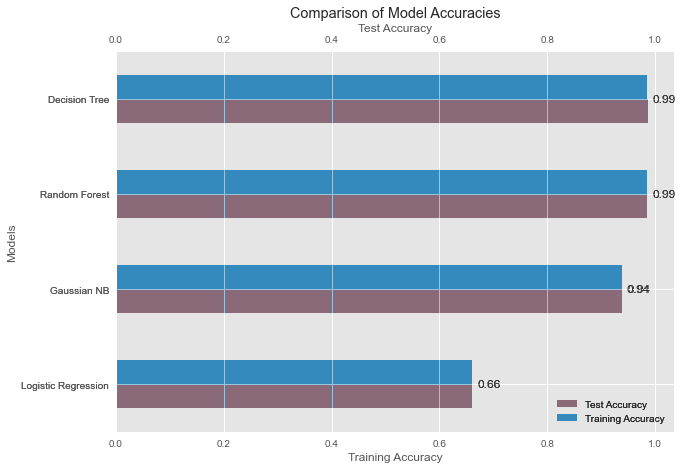

In [78]:
#visualizing the accuracies for all the models
# Set the plot style
plt.style.use('ggplot')

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
df_results.sort_values('Training Accuracy', ascending=True).plot(kind='barh', ax=ax)
# create 2nd Axis
ax2 = ax.twiny()
df_results.sort_values('Test Accuracy', ascending=True).plot(kind='barh', ax=ax2, alpha=0.5, color='C1')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Test Accuracy')

# Add the axis labels and Title
ax.set_xlabel('Training Accuracy')
ax.set_ylabel('Models')
ax.set_title('Comparison of Model Accuracies')

#Add Data Labels for Training Accuracy
for i, v in enumerate(df_results['Training Accuracy'].sort_values()):
    ax.text(v + 0.01, i, f'{v:.2f}', color='#333333', fontsize=12, va='center')

#Add Data Labels for Test Accuracy
for i, v in enumerate(df_results['Test Accuracy'].sort_values()):
    ax2.text(v + 0.01, i, f'{v:.2f}', color='#333333', fontsize=12, va='center')
# Show the plot
plt.show()

PLOTTING THE ROC CURVE

The roc curve was plotted for each Algorithm to determine how well each of them performed in predicting the target variable. it displayed the false positive and true positive rates in the curve.

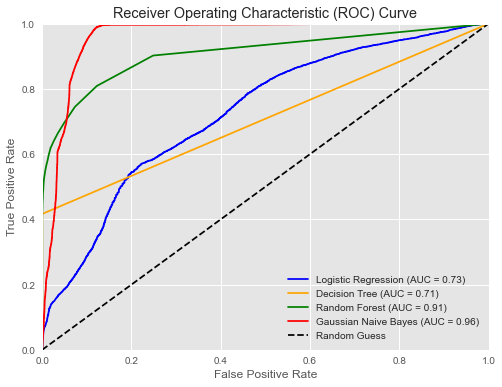

In [79]:
#Plotting the roc curve for model comparison
model_list = [lr, dt, rf, gnb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(X_train_scaler, y_train_res)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

FEATURE IMPORTANCE USING RANDOM FOREST 

The results showed that Random Forest classifier was the best model for predicting the target variable based on the high accuracy scores and a good performance in terms of precision, recall and F1 score. Therefore, the output of the Random Forest model was explained with SHAP (Shapley Additive explanations) by computing the contribution of each feature to the prediction of the target variable (defaulted/not defaulted).

USING SHAP VALUES TO EXPLAIN THE MODEL PREDICTION WITH RANDOM FOREST

In [86]:
!pip install shap

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [87]:
conda install -c conda-forge shap


Note: you may need to restart the kernel to use updated packages.


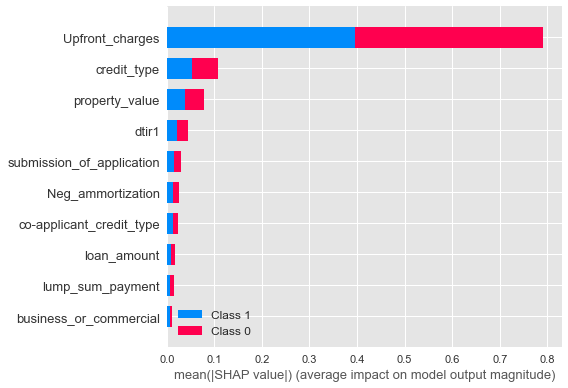

In [88]:
#Explaining  model predictions using shap values
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaler)

# summarize the effects of all the features
shap.summary_plot(shap_values, X_test_scaler, plot_type="bar")